In [65]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [161]:
from rasterio import plot
from rasterio.plot import show
from rasterio.windows import Window

from skimage import data, util, filters, color
from skimage.morphology import watershed, disk
from skimage.filters import rank

from scipy import ndimage as ndi

In [162]:
%matplotlib inline

In [163]:
%pwd

'/home/jovyan/learn_python'

In [164]:
src = rasterio.open("image.tif")

In [165]:
src.count

4

In [147]:
src.shape

(6000, 6000)

In [148]:
image = src.read([1,2,3], window = Window(5000, 5000, 500, 500))

In [149]:
type(image)

numpy.ndarray

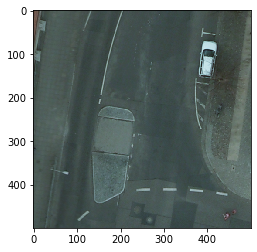

In [150]:
show(image)

In [196]:
image.shape

(3, 500, 500)

In [197]:
type(image)

numpy.ndarray

In [198]:
img = image[0, :, :]

In [199]:
img.shape

(500, 500)

In [200]:
edges = filters.sobel(img)

In [201]:
grid = util.regular_grid(img.shape, n_points=468)

In [202]:
seeds = np.zeros(img.shape, dtype=int)

In [203]:
seeds[grid] = np.arange(seeds[grid].size).reshape(seeds[grid].shape) + 1

In [204]:
w0 = watershed(edges, seeds)
w1 = watershed(edges, seeds, compactness=0.01)

In [205]:
type(w1)

numpy.ndarray

In [206]:
w1.shape

(500, 500)

In [207]:
w1

array([[  1,   1,   1, ...,  22,  22,  22],
       [  1,   1,   1, ...,  22,  22,  22],
       [  1,   1,   1, ...,  22,  22,  22],
       ...,
       [463, 463, 463, ..., 484, 484, 484],
       [463, 463, 463, ..., 484, 484, 484],
       [463, 463, 463, ..., 484, 484, 484]], dtype=int32)

In [208]:
w1.max()

484

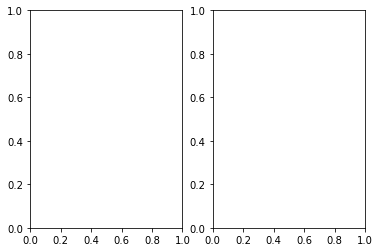

In [209]:
fig, (ax0, ax1) = plt.subplots(1, 2)

In [210]:
ax0.imshow(color.label2rgb(w0, img))
ax0.set_title('Classical watershed')

ax1.imshow(color.label2rgb(w1, img))
ax1.set_title('Compact watershed')

Text(0.5, 1, 'Compact watershed')

In [211]:
plt.show()

In [215]:
from rasterio import features
from collections import OrderedDict
from rasterio import Affine

In [216]:
rasterio.transform.xy (image.transform, 5000, 5000)

AttributeError: 'numpy.ndarray' object has no attribute 'transform'

In [ ]:
image.transform

In [214]:
shps = features.shapes(ras, transform=src.transform)
records = []

for id, shp in enumerate(shps):
    if shp[1] != 0:
        item = {'geometry': shp[0], 'id': id+1, 'properties': 
                OrderedDict([('dn', np.int(shp[1]))]),
                'type': 'Feature'}
        records.append(item)

vec = GeoDataFrame.from_features(records)
vec.crs = src.crs

ValueError: height must be > 0